In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime


In [2]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

In [4]:
pd.set_option('display.max_columns', 500)

## List of points

In [8]:
point_list(foldername=homedir)

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


,Point_1,Point_2,Point_3,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,Point_25,Point_26,Point_27,Point_28
0,25.0,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,75.0,75.0,75.0,75.0,50.0,50.0,50.0,50.0,50.0,100.0,100.0,100.0,100.0,100.0


## Time trace plot

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


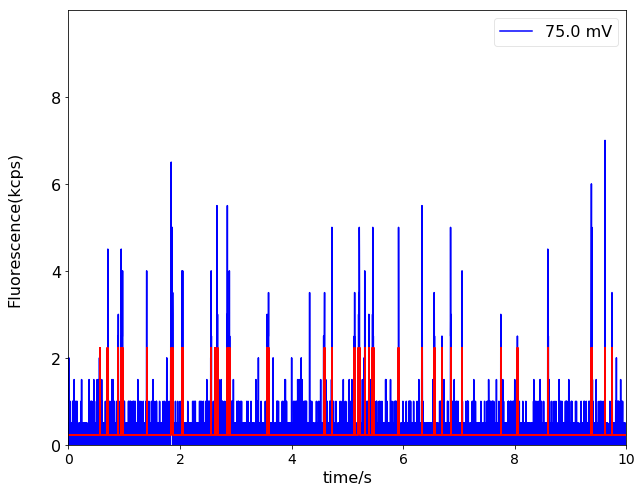

In [9]:
fig = time_trace_plot(foldername= homedir, input_potential=[75], pointnumbers=[13],
                      x_lim_min=0, y_lim_min=0, x_lim_max=10, y_lim_max=10, bin=2, show_changepoint=True)

## On-off histogram: 1D

### 100 mV

#### Point_26: 1600 s

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


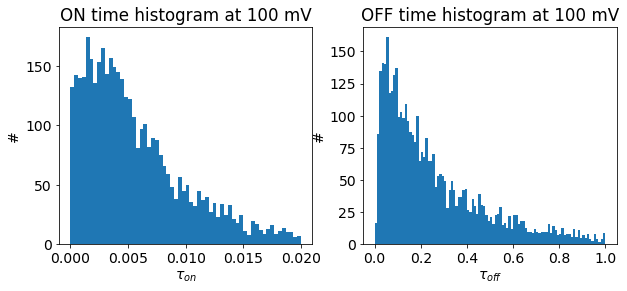

In [18]:
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S106d18May17_635_CuAzu655_longtime';#data directory
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[100], pointnumbers=[26], bins_on=60, range_on=[0, 0.02], bins_off=100, range_off=[0, 1], plotting=True)

### 75 mV

#### Point_13: 360 s

Point number in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly placed(found): 
potential value in Point_A7_075mV(12)_60.5_360s_16_Dif.pt3 is not properly defined


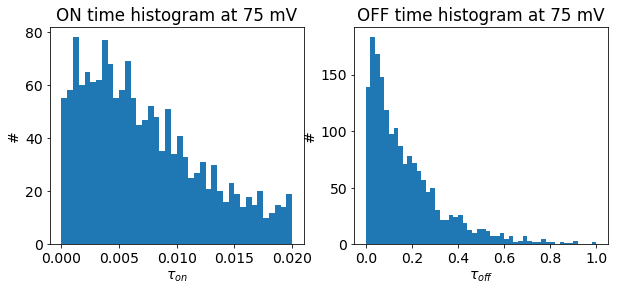

In [11]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[13], bins_on=40, range_on=[0, 0.02], bins_off=50, range_off=[0, 1], plotting=True)